In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data sources:    
1. this data comes from Kaggle (u can find it by typing the link bellow:)    
https://www.kaggle.com/datasets/ruthgn/bank-marketing-data-set    
### Resumé et objectif:    
Cet ensemble de données contient des enregistrements relatifs à une campagne de marketing direct d'une institution bancaire portugaise. La campagne de marketing a été réalisée par le biais d'appels téléphoniques. Souvent, plusieurs appels doivent être passés à un même client avant qu'il ne refuse ou n'accepte de souscrire à un dépôt à terme. L'objectif de la classification est de prédire si le client souscrira (oui/non) au dépôt à terme **(variable y)**.

### definition de klks variables:    
1. poutcome : résultat de la campagne marketing précédente (catégorique : 'échec', 'inexistant', 'succès')    
2.  previous : nombre de contacts effectués avant cette campagne et pour ce client (numérique)    
3. emp.var.rate : taux de variation de l'emploi - indicateur trimestriel (numérique)    
4. cons.price.idx : indice des prix à la consommation - indicateur mensuel (numérique)    
5. cons.conf.idx : indice de confiance des consommateurs - indicateur mensuel (numérique)    
6. euribor3m : taux euribor à 3 mois - indicateur quotidien (numérique)    


In [2]:
df=pd.read_csv("C:/Users/A.Mballo/Documents/Mes_Scripts/M2LM-DS1-Machine_Learning Avancé/bank-direct-marketing-campaigns.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data Exploration

In [3]:
df.shape

(41188, 20)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
#taux de valeurs manquantes pour chaque colonnes
(df.isna().sum(axis=0)/df.shape[0]*100)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [6]:
#nous allons voir les stats sur les variables numeriques
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [7]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [8]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [9]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [10]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [11]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [12]:
#on supprime quelques variables 
df=df.drop(['day_of_week', 'pdays'], axis=1)
df

,age,job,marital,education,default,housing,loan,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [13]:
#encoder la variable 'y'
df.y.replace(['no', 'yes'], [0, 1], inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [14]:
#encoder la variable 'loan'
df.loan.replace(['no', 'yes', 'unknown'], [0, 1, 2], inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,0,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,0,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,0,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,0,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,1,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,0,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,0,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,0,cellular,nov,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,0,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [15]:
#encoder la variable 'default'
df.default.replace(['no', 'yes', 'unknown'], [0, 1, 2], inplace=True)
df
#ici 2== 'unknown'

,age,job,marital,education,default,housing,loan,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,no,0,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,2,no,0,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,yes,0,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,no,0,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,no,1,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,yes,0,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0,no,0,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0,yes,0,cellular,nov,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0,no,0,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [16]:
#Encoder la varible 'housing'
df.housing.replace(['no', 'yes', 'unknown'], [0, 1, 2], inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,2,0,0,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0,0,0,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0,1,0,cellular,nov,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0,0,0,cellular,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [17]:
#Encoder la variable 'contact'
df.contact.replace(['telephone', 'cellular'], [0, 1], inplace=True)
df

# telephone==0 et cellular==1

,age,job,marital,education,default,housing,loan,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,0,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,2,0,0,0,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,0,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,0,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,0,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,1,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0,0,0,1,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0,1,0,1,nov,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0,0,0,1,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [18]:
#Encoder la variable 'marital'
df.marital.replace(['married', 'single', 'divorced', 'unknown'], [0, 1, 2, 3], inplace=True)
df


# married=0
# single=1
# divorced=2
# unknown=3


,age,job,marital,education,default,housing,loan,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,0,basic.4y,0,0,0,0,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,0,high.school,2,0,0,0,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,0,high.school,0,1,0,0,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,0,basic.6y,0,0,0,0,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,0,high.school,0,0,1,0,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,0,professional.course,0,1,0,1,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,0,professional.course,0,0,0,1,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,0,university.degree,0,1,0,1,nov,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,0,professional.course,0,0,0,1,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [19]:
#Encoder la variable "poutcome"
df.poutcome.replace(['nonexistent', 'success', 'failure'], [0, 1, 2], inplace=True)
df


# nonexistant==0
# succes==1
#failure==2


,age,job,marital,education,default,housing,loan,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,0,basic.4y,0,0,0,0,may,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,0,high.school,2,0,0,0,may,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,0,high.school,0,1,0,0,may,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,0,basic.6y,0,0,0,0,may,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,0,high.school,0,0,1,0,may,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,0,professional.course,0,1,0,1,nov,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,0,professional.course,0,0,0,1,nov,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,0,university.degree,0,1,0,1,nov,2,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,0,professional.course,0,0,0,1,nov,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
marital,41188.0,0.510634,0.696779,0.000,0.000,0.000,1.000,3.000
default,41188.0,0.417525,0.812813,0.000,0.000,0.000,0.000,2.000
housing,41188.0,0.571914,0.541209,0.000,0.000,1.000,1.000,2.000
loan,41188.0,0.199767,0.456002,0.000,0.000,0.000,0.000,2.000
contact,41188.0,0.634748,0.481507,0.000,0.000,1.000,1.000,1.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
poutcome,41188.0,0.239803,0.623518,0.000,0.000,0.000,0.000,2.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400


In [21]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [22]:
len(df[df['y']==0])

36548

In [23]:
#Nombre de conversions de 'y'
len(df[df['y']==1])

4640

In [24]:
# Nombre total de valeurs de 'y'
len(df.y)

41188

In [25]:
#Taux de conversion
len(df[df['y']==1])/len(df.y)*100

11.265417111780131

In [26]:
#taux de conversion de la variable 'y'
(df['y'].sum(axis=0)/df.shape[0]*100)

11.265417111780131

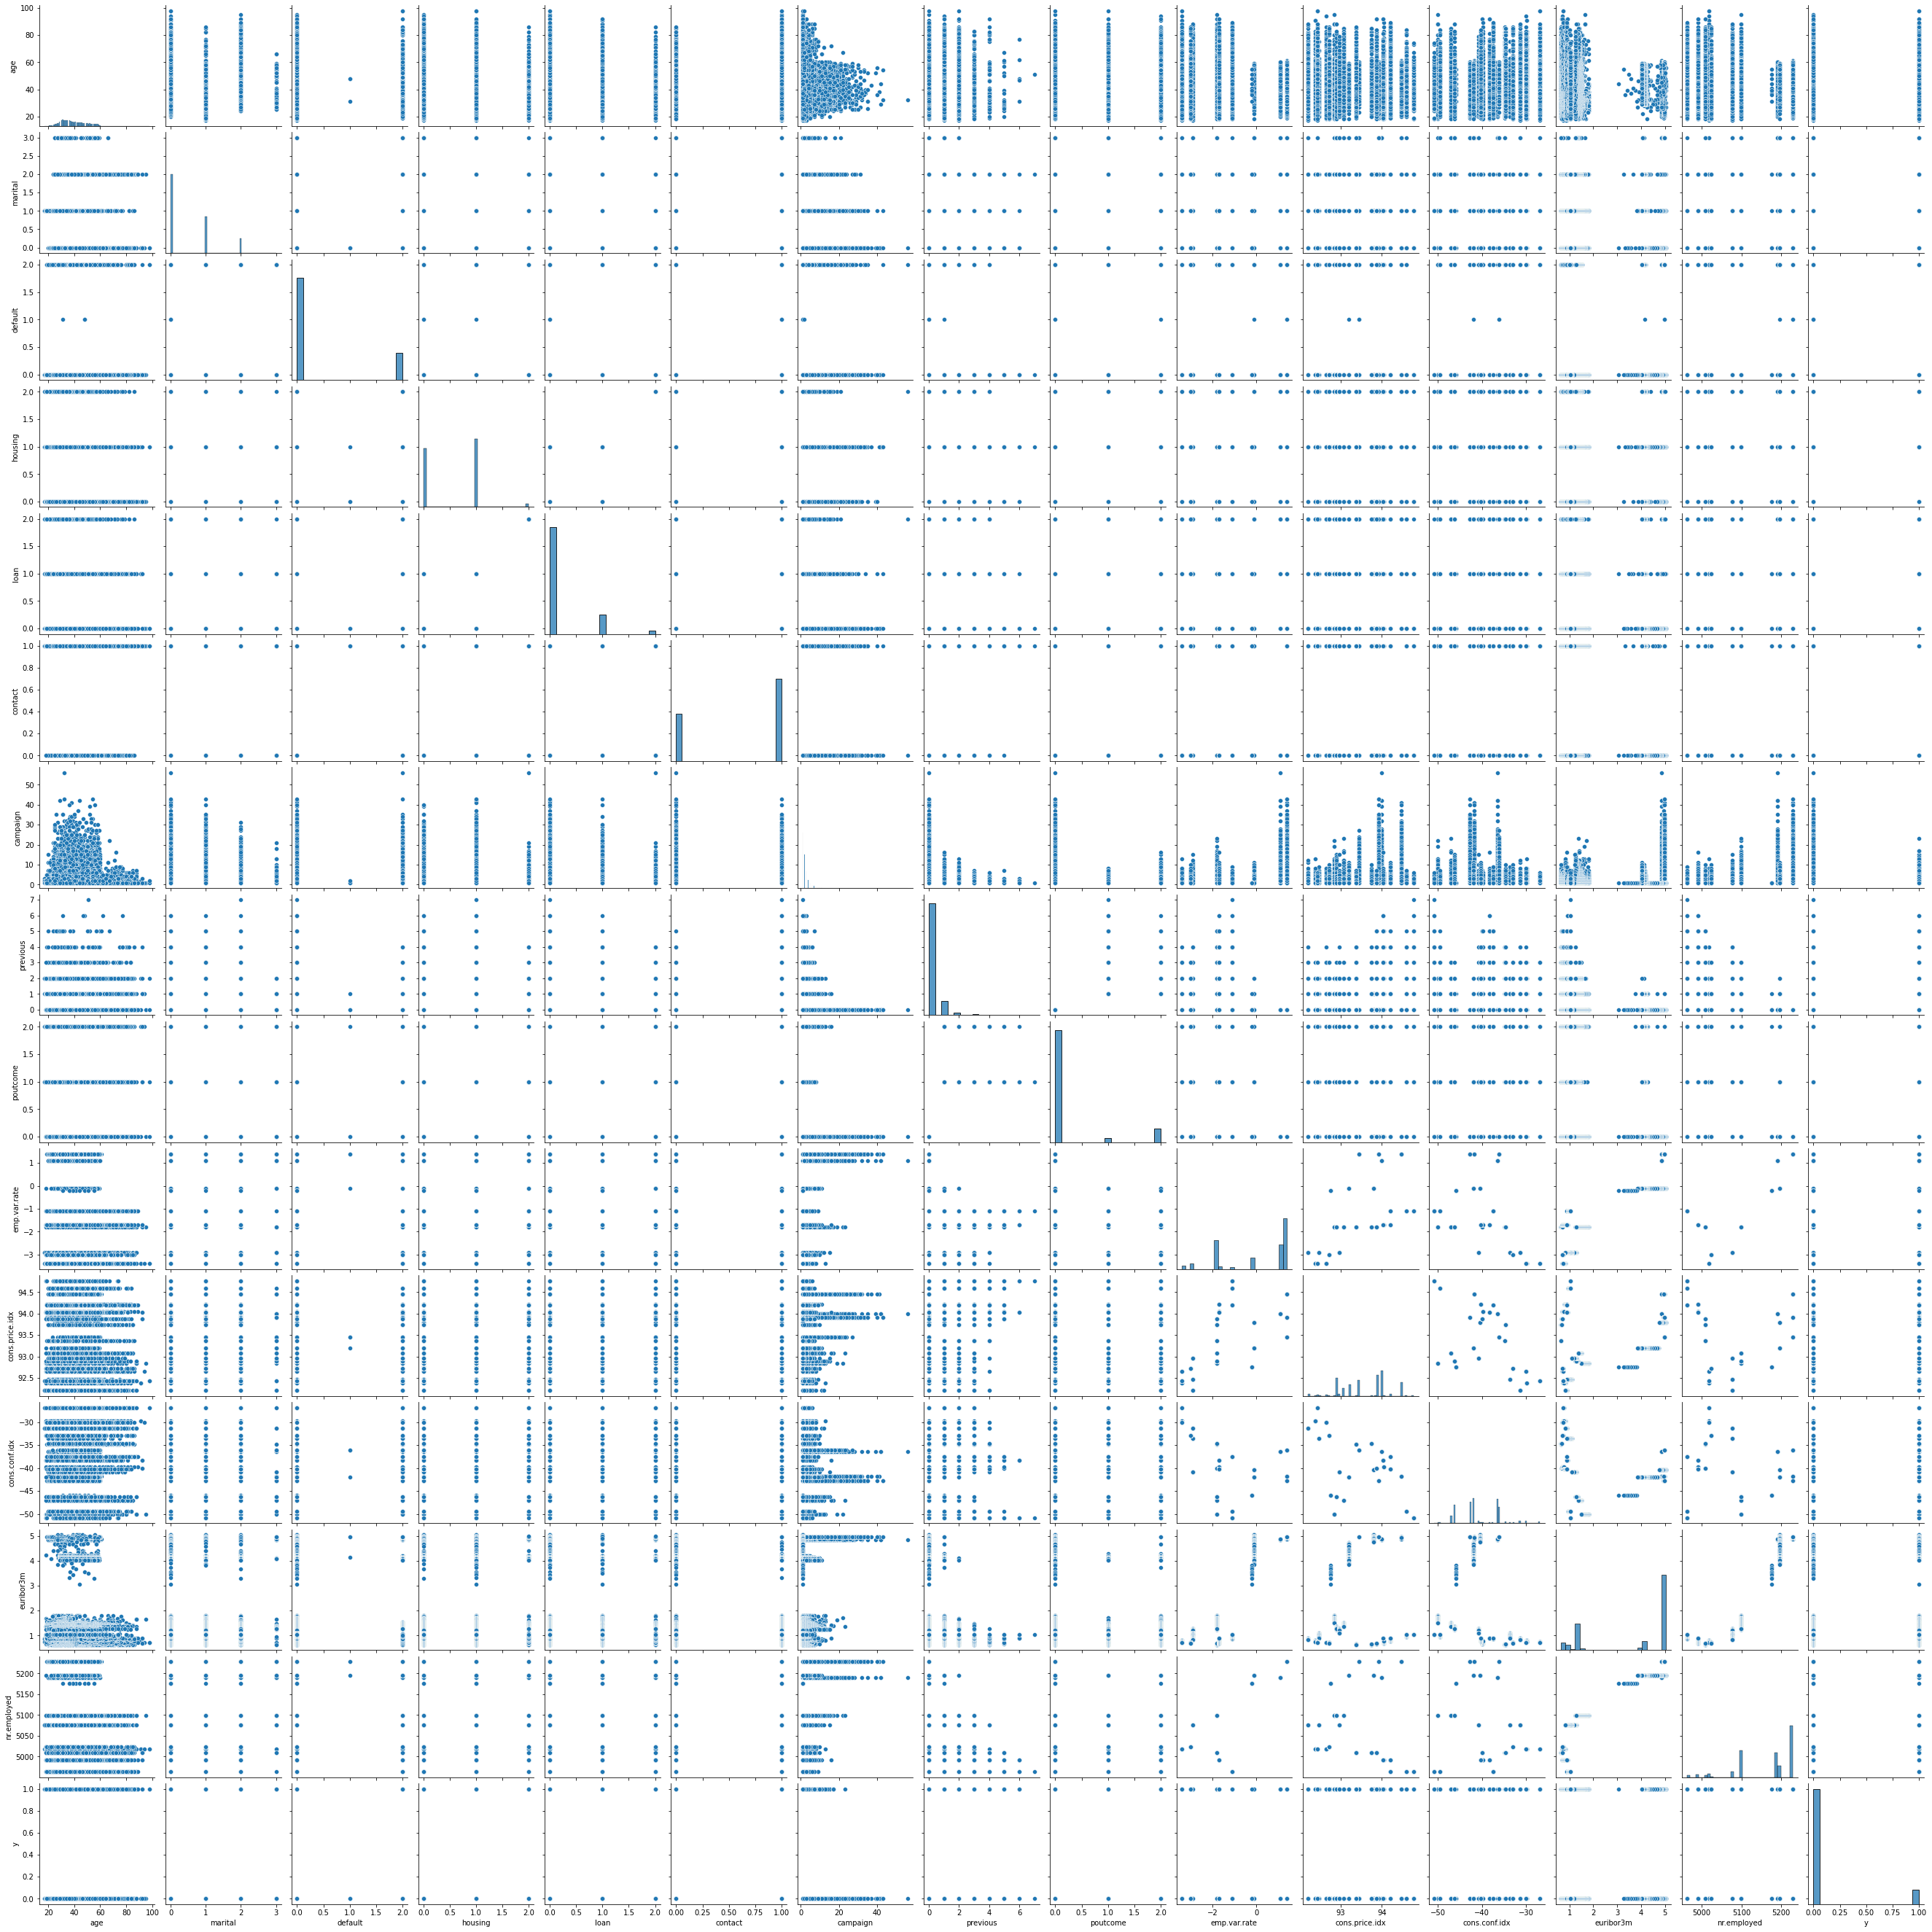

In [27]:
sns.pairplot(df)

<AxesSubplot:>

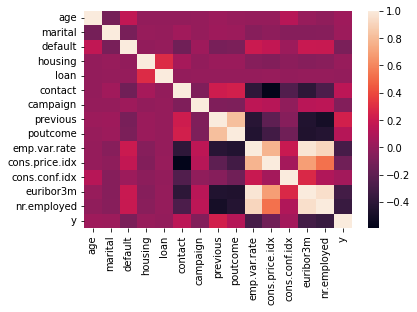

In [28]:
sns.heatmap(df.corr())

### Note:    
Ici on remarque que les variables les plus correlées avec la target sont les suivantes:    
-age   
-marital    
-loan    
-housing    
-contact    
-previous   
-poutcome    
-cons.conf.idx   


In [29]:
#voyons en plus clair les correlations de ces variables avec la target:
from scipy.stats import pearsonr
corr_age_y=pearsonr(df.age, df.y)
corr_age_y

(0.03039880304000355, 6.802136418795982e-10)

In [30]:
corr_marital_y=pearsonr(df.marital, df.y)
corr_marital_y

(0.02630233537363118, 9.357669515018811e-08)

In [31]:
corr_contact_y=pearsonr(df.contact, df.y)
corr_contact_y

(0.14477305571200924, 9.856509177694258e-192)

In [32]:
corr_previous_y=pearsonr(df.previous, df.y)
corr_previous_y

(0.23018100321659202, 0.0)

In [33]:
corr_poutcome_y=pearsonr(df.poutcome, df.y)
corr_poutcome_y

(0.12208912918511497, 1.5672918257246038e-136)

In [34]:
corr_cons_conf_idx_y=pearsonr(df['cons.conf.idx'], df.y)
corr_cons_conf_idx_y

(0.05487794605319525, 7.536664996964362e-29)

In [35]:
corr_default_y=pearsonr(df['default'], df.y)
corr_default_y

(-0.09932441365142189, 8.480641045843455e-91)

In [36]:
corr_loan_y=pearsonr(df['loan'], df.y)
corr_loan_y

(-0.005038349297918502, 0.30654444208201803)

In [37]:
corr_housing_y=pearsonr(df['housing'], df.y)
corr_housing_y

(0.009551740070575928, 0.05256292116742576)

In [38]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'campaign', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [39]:
df_final=df.drop(['job', 'education', 'month', 'campaign', 'emp.var.rate',
       'cons.price.idx', 'euribor3m', 'nr.employed'], axis=1)
df_final

,age,marital,default,housing,loan,contact,previous,poutcome,cons.conf.idx,y
0,56,0,0,0,0,0,0,0,-36.4,0
1,57,0,2,0,0,0,0,0,-36.4,0
2,37,0,0,1,0,0,0,0,-36.4,0
3,40,0,0,0,0,0,0,0,-36.4,0
4,56,0,0,0,1,0,0,0,-36.4,0
...,...,...,...,...,...,...,...,...,...,...
41183,73,0,0,1,0,1,0,0,-50.8,1
41184,46,0,0,0,0,1,0,0,-50.8,0
41185,56,0,0,1,0,1,0,0,-50.8,0
41186,44,0,0,0,0,1,0,0,-50.8,1


In [40]:
#sns.pairplot(df_final)

<AxesSubplot:>

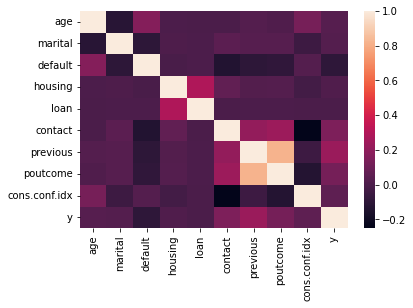

In [41]:
sns.heatmap(df_final.corr())

c:\myapplications\python3.8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

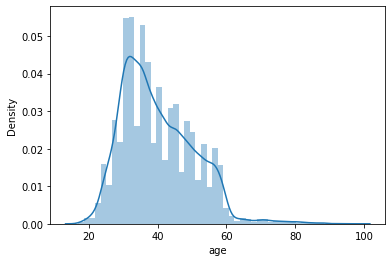

In [42]:
#la distribution des ages des clients lors de la campagne
sns.distplot(df_final['age'])

# Modelisation:    
Nous sommes en face d'un probleme de classiofication on va donc choisir un modele adapté pour ce genre de situation, en l'occurence un KNeighborsClassifier

In [43]:
#Importer les packages
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#choix du modele
modele=KNeighborsClassifier()

In [45]:
#determinons notre target et les futures
y=df_final['y']
X=df_final.drop(['y'], axis=1)

In [46]:
print(X.head())

   age  marital  default  housing  loan  contact  previous  poutcome  \
0   56        0        0        0     0        0         0         0   
1   57        0        2        0     0        0         0         0   
2   37        0        0        1     0        0         0         0   
3   40        0        0        0     0        0         0         0   
4   56        0        0        0     1        0         0         0   

   cons.conf.idx  
0          -36.4  
1          -36.4  
2          -36.4  
3          -36.4  
4          -36.4  


In [47]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [48]:
print(X.shape, y.shape)

(41188, 9) (41188,)


### Entrainement:    

In [49]:
modele.fit(X, y)

KNeighborsClassifier()

In [50]:
#tester le score
modele.score(X, y)

0.9095610371952996

In [62]:
n_neighbors=range(1, 11)
score=[]

for i in n_neighbors:
    modele=KNeighborsClassifier(i)
    modele.fit(X, y)
    score.append(modele.score(X, y))
    i+=1
print(score)

[0.9108720986695154, 0.9162620180635136, 0.9139555210255415, 0.910022336602894, 0.9095610371952996, 0.9058949208507332, 0.9054579003593279, 0.9041468388851122, 0.9038312129746529, 0.9007477906186268]


#### comments:    
pour un 1er entrainement avec un modele de KNeighbors (n_nighbors=0), on obtient deja un score de **90%**

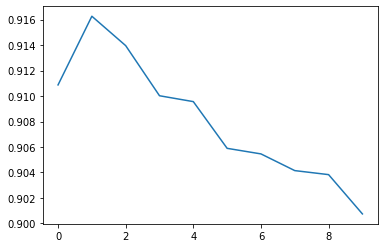

In [64]:
#Visualisons nos scores:
plt.plot(score)

## Prediction:    


In [51]:
y_pred=modele.predict(X)

In [52]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [53]:
#print('predict_proba', modele.predict_proba(X))

# Best way:    
on va utiliser la meilleure façon de modeliser notre probleme    


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=50)

In [79]:
#On va afficher nos tableaux de données:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (32950, 9)
X_test: (8238, 9)
y_train: (32950,)
y_test: (8238,)


In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
model=KNeighborsClassifier(n_neighbors=1)

In [115]:
#Entrainement du modele
model.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
model.score(X_test, y_test)
# 1er_score==0.841

0.8415877640203933

### Amelioration du modele:    

1. On va utiliser cross_val_score() pour tester dans le validarion_test   
2. GridSearchCV pour regler les hyperparametres    
etc.

In [84]:
#on importe cross_val_score:
from sklearn.model_selection import cross_val_score

In [86]:
#On fait la moyenne des scores obtenus dans cross_val_score:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.8870713201820941

In [99]:
#on va utiliser validation_curve() pour choisir le meilleur score dans une liste de 'n_neighbors':

model=KNeighborsClassifier()
k=np.arange(1, 10)
from sklearn.model_selection import validation_curve

#on prend le score du train et du validation set:

train_score, val_score=validation_curve(model, X_train, y_train, 
                                          param_name='n_neighbors', 
                                          param_range=k, 
                                          cv=5)
val_score.shape     #on obtient un tableau de 9 lignes pour les k (k==1-10) et 5 colonnes pour les split(cv=5)


(9, 5)

In [100]:
#on fait la moyenne suivant les lignes pour avoir la moyenne des 5 split pour chaque k correspondant
val_score.mean(axis=1)

array([0.84540212, 0.8877997 , 0.88279211, 0.88965099, 0.88707132,
       0.88980273, 0.88807284, 0.88974203, 0.88858877])

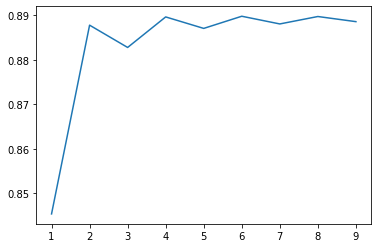

In [91]:
#Now on peut aficher nos scores en fonction du k et de cette moyenne des 5 split:

plt.plot(k, val_score.mean(axis=1))

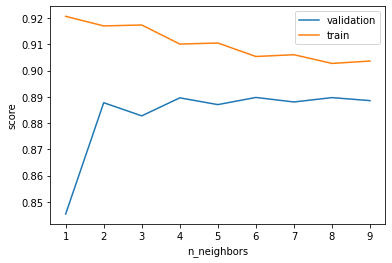

In [101]:
#on compare les scores sur le train_set et sur le validation_set:
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

### Rmq:    
on voit que pour le **train_set**, les meilleurs scores sont obtenus avec  un nombre de neighbors autour de [1; 2],    
alors que pour le **validation_set**, on les obtient dans les alentours de [4; 7]

## GridSearchCV:    

In [102]:
#testons GridSearchCV, pour voir le meilleur modele avec les meilleurs hyperparametres:
from sklearn.model_selection import GridSearchCV

param_grid={'n_neighbors': np.arange(1, 10),
           'metric': ['euclidean', 'manhattan']}
#on va passer à GridSearchCV le modele et le dict de param qu'on vient de definir

grid=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5) #cette grille contient +siurs estimateurs


In [103]:
#on va entrainer cette grille avec fit() comme s'il s'agissait d'un estimateur
grid.fit(X_train, y_train)  #tjrs avec les données du train_set

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [104]:
#on peut maintenant voir le meilleur score
grid.best_score_                   #score=0.95


0.8916540212443096

In [105]:
#on peut voir les meilleurs parametres pour ce score:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 6}

###### Rmq:    
le meilleur score est obtenu avec la combinaison    
1. de l'hyperparametre (metric) **manhattan**    
2. avec un **n_neighbors**=6    

le score obtenu est de: **0.89**

On va sauvegarder ce modele comme modele final

In [109]:
# Notre modele final
model_final=grid.best_estimator_

In [110]:
#on va maintenant le tester sur le Test_set
model_final.score(X_test, y_test)

0.8858946346200534

### Results:   
notre modele a finalement obtenu unn score de **89%** qu lieu de **84%** comme au debut.    
Les parametres à prendre en compte:   
1. hyperparametre **'manhatan'**   
2. **n_neighbors == 6**    

   ## Evaluation de performances:     
   on va evaluer les performances du modele avec une autre mesure la **Confusion matrix**    

In [113]:
from sklearn.metrics import confusion_matrix

In [114]:
confusion_matrix(y_test, model_final.predict(X_test))

array([[7143,  145],
       [ 795,  155]], dtype=int64)

#### Interpretation:    
-sur la 1ere ligne, on voit que **7143** ont été rangé dans la classe 0 (n'ayant pas souscrit) contre **145** (ayant souscrit)    

-sur la deuxieme ligne, c'est plutôt **155** que le modele a predit (classe 1) contre **795** de la classe 0 (n'ayant pas souscrit).    

d'oû le score de notre modele: **89%**